In [6]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir('../scripts')
from utils import split_annotations
os.chdir('../experiments')

In [3]:
annotations_path = Path('../data/annotations/annotations.xlsx')
target_dir_path = Path('../data/annotations/splits/three/10_20/')

In [4]:
# Split the original annotations file into train, validation and test annotations files
# test_ratio = 0.1, val_ratio = 0.2 (values by default)
split_annotations(annotations_path, target_dir_path)

# Read the previous three created .xlsx files into dataframes
train_df = pd.read_excel(target_dir_path / 'train_annotations.xlsx')
val_df = pd.read_excel(target_dir_path / 'val_annotations.xlsx')
test_df = pd.read_excel(target_dir_path / 'test_annotations.xlsx')

len(train_df), len(val_df), len(test_df)

(2520, 630, 350)

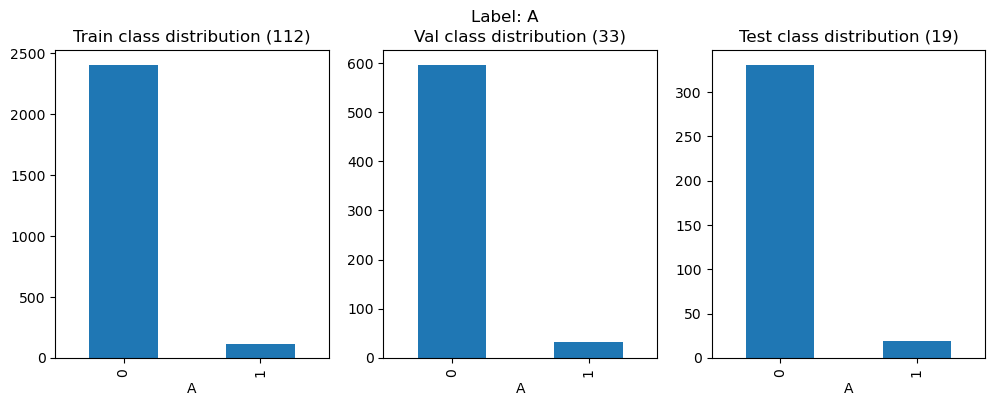

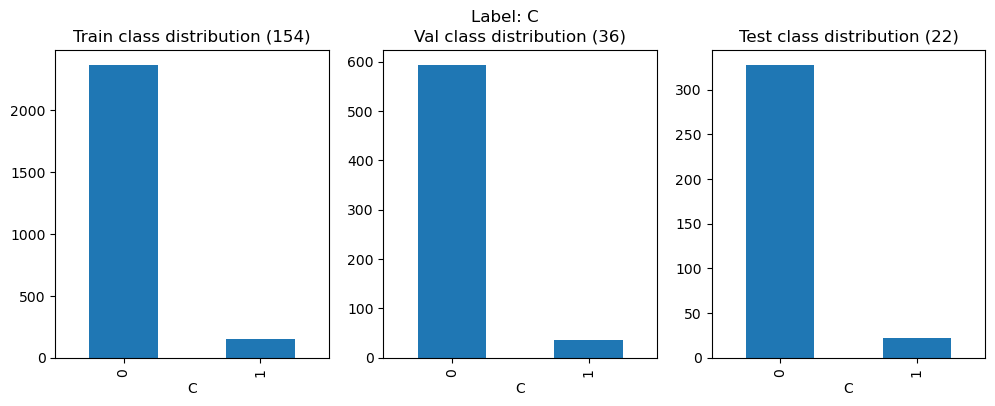

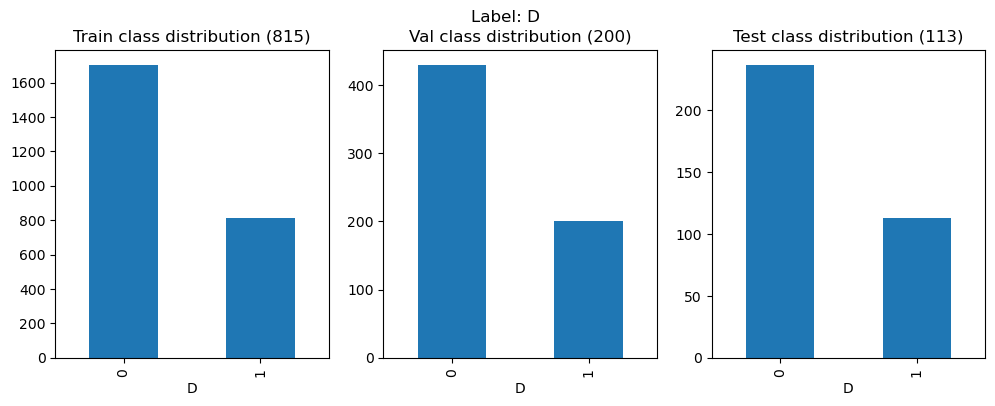

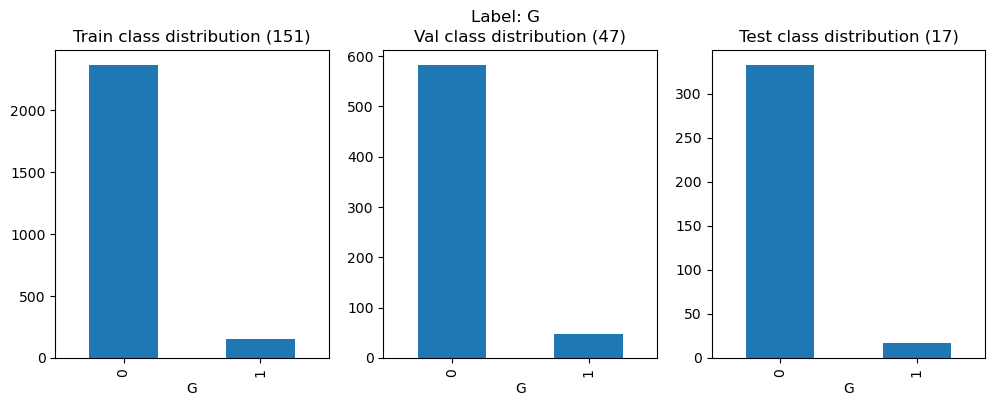

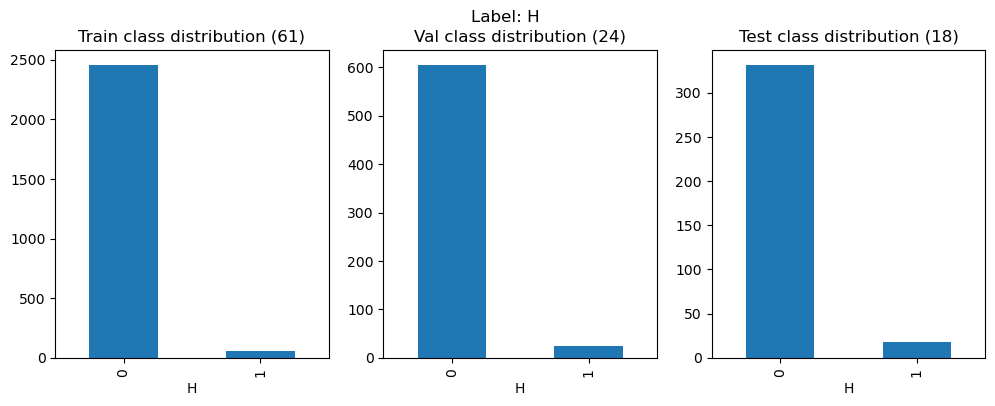

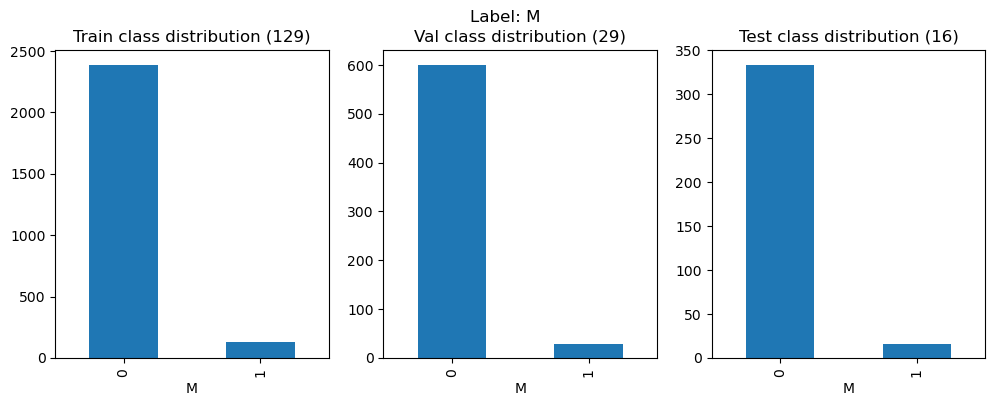

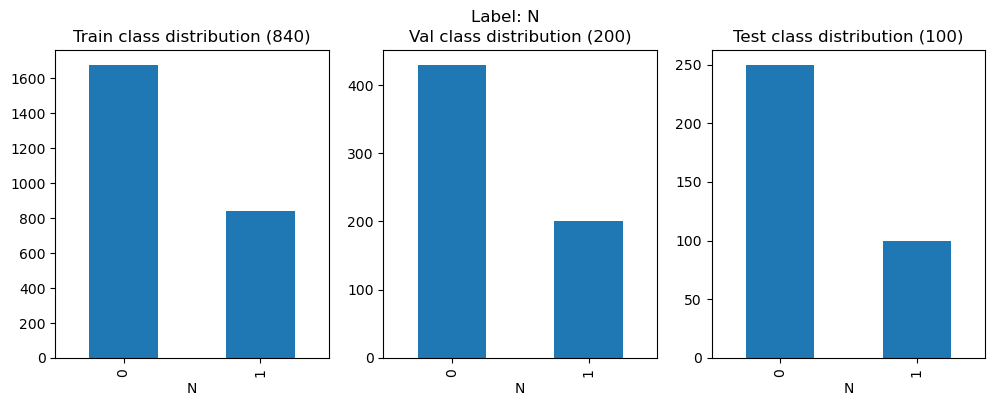

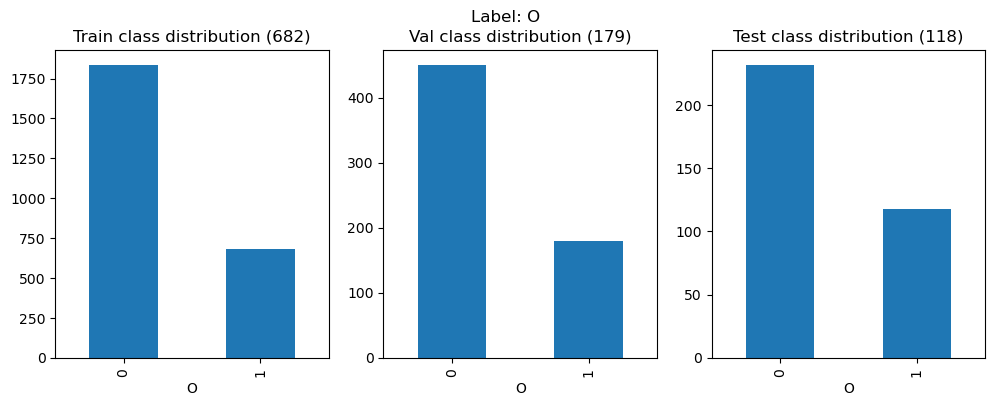

In [8]:
label_names = ['A','C','D','G','H','M','N','O']

for i, label in enumerate(label_names):
    plt.figure(figsize=(12,4))
    
    total_label_train = int(train_df.loc[:, [label]].sum())
    total_label_val = int(val_df.loc[:, [label]].sum())
    total_label_test = int(test_df.loc[:, [label]].sum())
    
    plt.subplot(1,3,1)
    train_df.pivot_table(index=label, aggfunc='size').plot(kind='bar', title = f'Train class distribution ({total_label_train})')
    plt.subplot(1,3,2)
    val_df.pivot_table(index=label, aggfunc='size').plot(kind='bar', title = f'Val class distribution ({total_label_val})')
    plt.subplot(1,3,3)
    test_df.pivot_table(index=label, aggfunc='size').plot(kind='bar', title = f'Test class distribution ({total_label_test})')
    
    plt.suptitle(f'Label: {label}')